In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Load

In [6]:
df=pd.read_csv('..\data\Telco-Customer-Churn.csv')
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Pratyush Basu\AppData\Local\Temp\ipykernel_16020\3162915172.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('..\data\Telco-Customer-Churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Check shape & data types


In [19]:
print("Shape is:",df.shape)

Shape is: (7043, 21)


In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


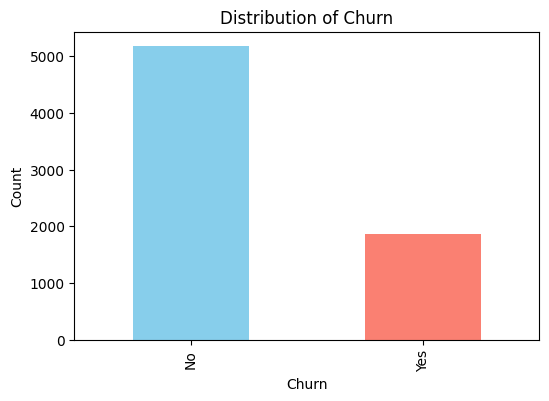

In [23]:
# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(6,4))
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Fix TotalCharges

In [24]:
# Check current data type
df['TotalCharges'].dtype


dtype('O')

In [25]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [26]:
df['TotalCharges'].dtype

dtype('float64')

In [27]:
# Check missing values
df['TotalCharges'].isna().sum()


11

In [ ]:
#Missing TotalCharges with 0 mostly occurs when tenure = 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

### EDA

Text(0.5, 1.0, 'Churn Percentage Distribution')

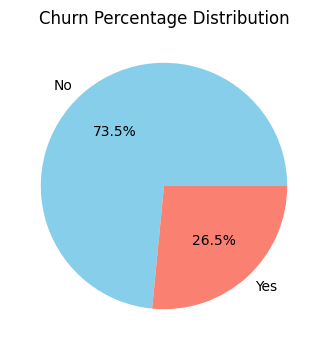

In [37]:
size=df['Churn'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
plt.pie(size, labels=size.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Churn Percentage Distribution')


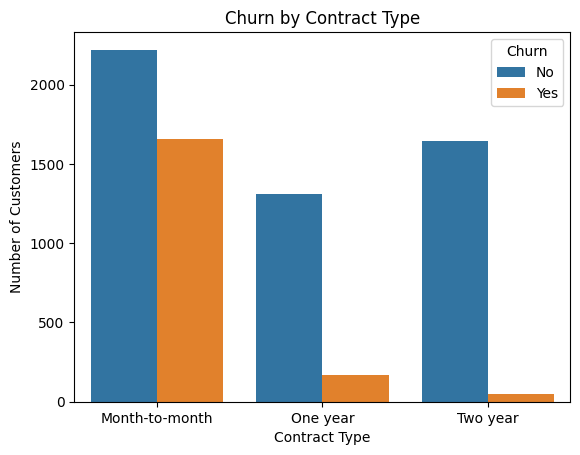

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()


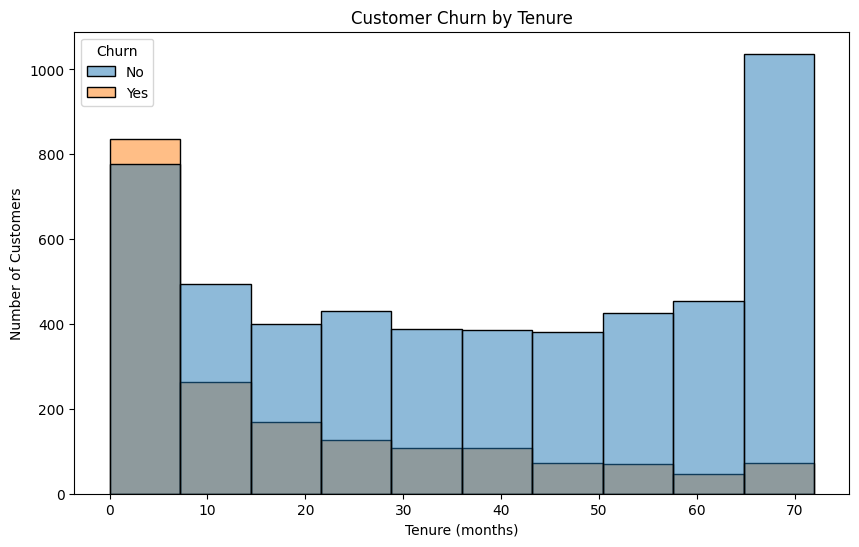

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', bins=10, kde=False)
plt.title('Customer Churn by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()


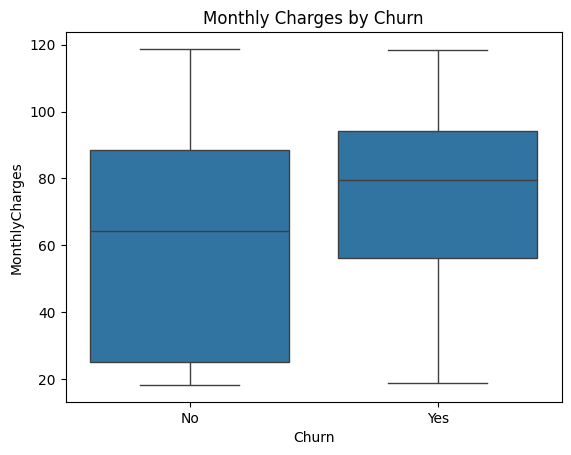

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()


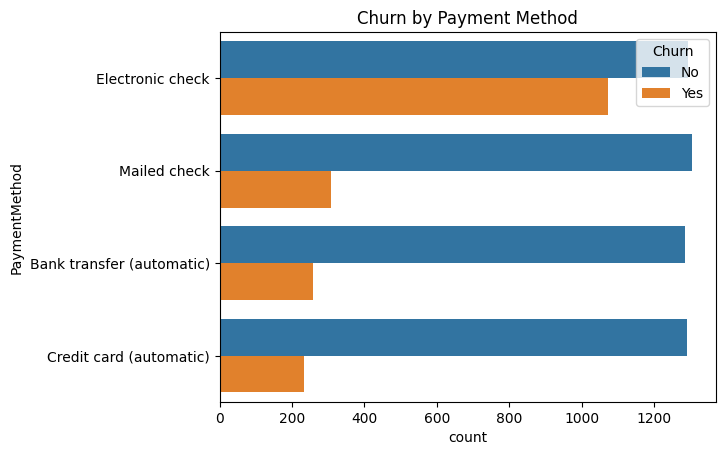

In [56]:
sns.countplot(y='PaymentMethod', hue='Churn', data=df)
plt.title("Churn by Payment Method")
plt.show()

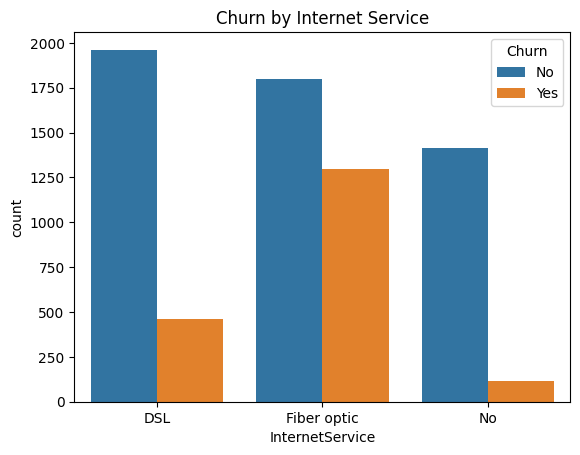

In [57]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()

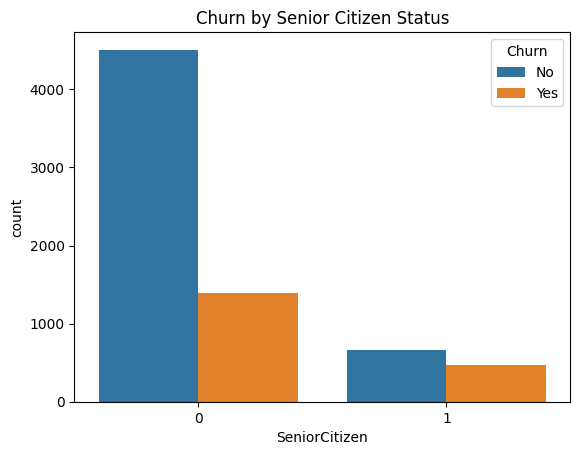

In [51]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Churn by Senior Citizen Status")
plt.show()

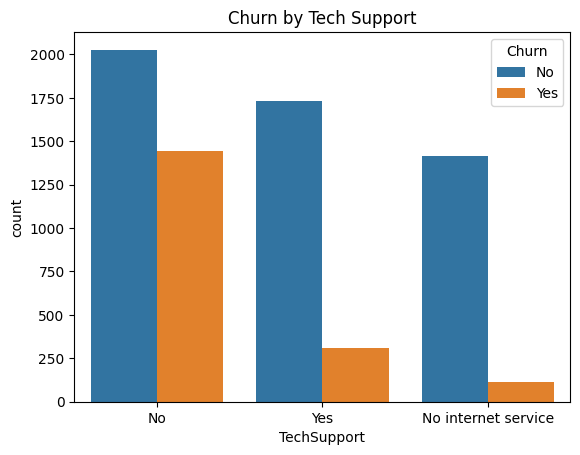

In [54]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn by Tech Support")
plt.show()

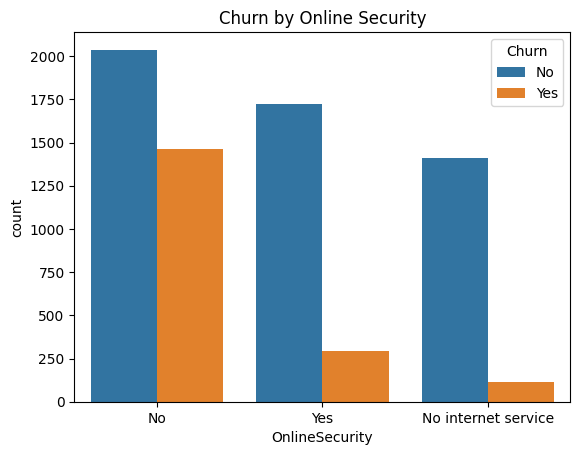

In [55]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title("Churn by Online Security")
plt.show()

In [58]:
df.to_csv("../data/Telco-Customer-Churn-after-clean.csv", index=False)